**Plotting mixtures and pure**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [89]:
ref_df = pd.read_csv("reference_v2.csv")
mix_df = pd.read_csv("mixtures_dataset.csv")
crop_mask = wavenumbers < 1700
cropped_wavenumbers = wavenumbers[crop_mask]

In [90]:
# Updated plotting functions with wavenumber masking
def plot_avg_pure_spectrum(pure_label):
    pure_specs = ref_df[ref_df['Label'] == pure_label].drop(columns='Label').values
    avg_pure = pure_specs.mean(axis=0)
    avg_pure_cropped = avg_pure[crop_mask]
    avg_pure_norm = minmax_normalize(avg_pure_cropped)

    plt.figure(figsize=(10, 4))
    plt.plot(cropped_wavenumbers, avg_pure_norm, label=f'Avg Pure (Normalized): {pure_label}')
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Normalized Intensity")
    plt.title(f"Average Pure Raman Spectrum (Cropped): {pure_label}")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_avg_mixture_spectrum(label1, label2):
    mix_specs = mix_df[
        ((mix_df['Label 1'] == label1) & (mix_df['Label 2'] == label2)) |
        ((mix_df['Label 1'] == label2) & (mix_df['Label 2'] == label1))
    ]
    mix_array = mix_specs.drop(columns=['Label 1', 'Label 2']).values
    avg_mix = mix_array.mean(axis=0)
    avg_mix_cropped = avg_mix[crop_mask]
    avg_mix_norm = minmax_normalize(avg_mix_cropped)

    plt.figure(figsize=(10, 4))
    plt.plot(cropped_wavenumbers, avg_mix_norm, label=f'Avg Mixture (Normalized): {label1} + {label2}')
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Normalized Intensity")
    plt.title(f"Average Mixture Raman Spectrum (Cropped): {label1} + {label2}")
    plt.legend()
    plt.tight_layout()
    plt.show()

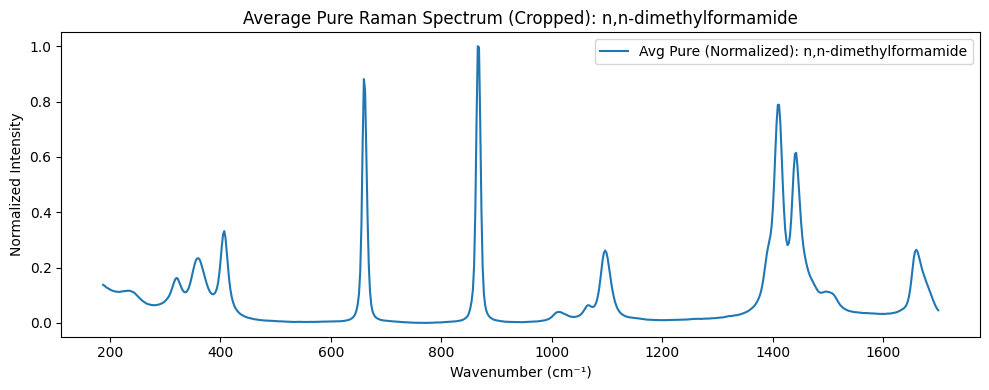

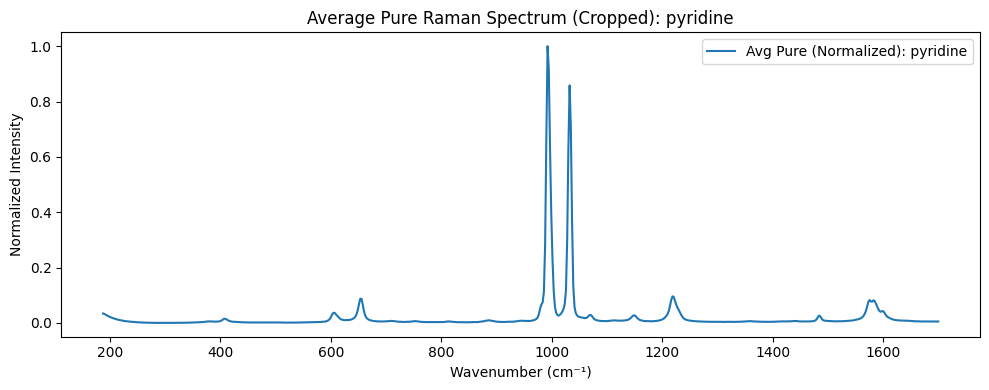

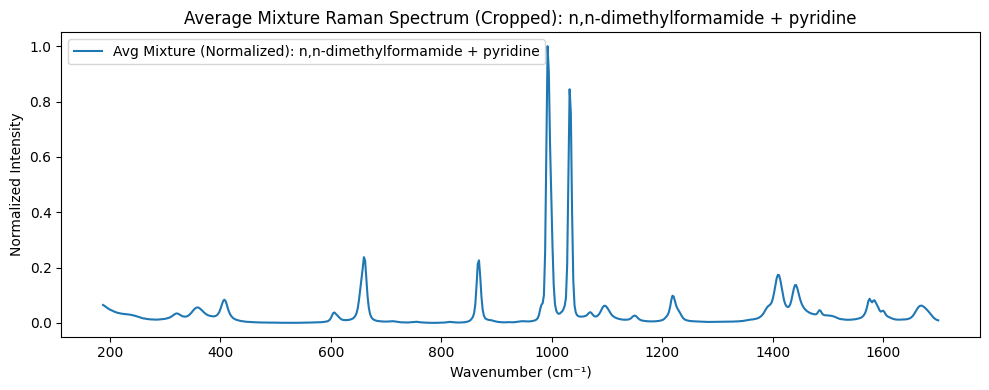

In [91]:
plot_avg_pure_spectrum("n,n-dimethylformamide")
plot_avg_pure_spectrum("pyridine")
plot_avg_mixture_spectrum("n,n-dimethylformamide", "pyridine")

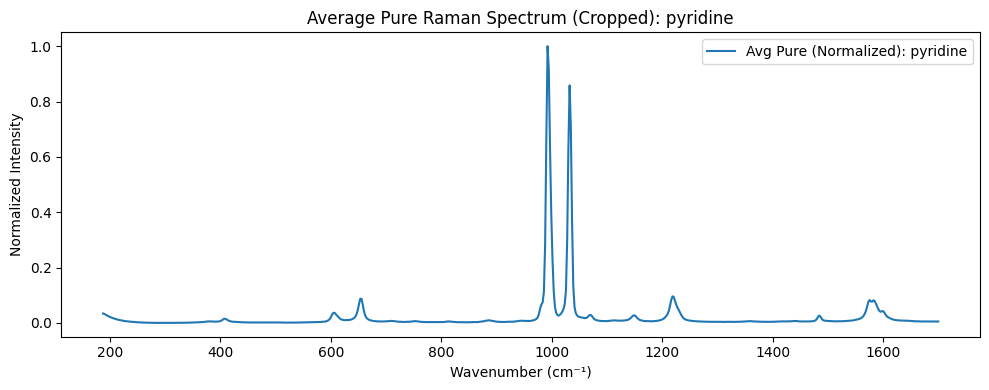

In [92]:
plot_avg_pure_spectrum("pyridine")